In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

%matplotlib inline
sb.set_style('darkgrid')

path = "data/data.csv"
data = pd.read_csv(path)
data['dump_time'] = pd.to_datetime(data['dump_time'])
data = data.set_index('dump_time')
data['date'] = data.index.date
data['weekofyear'] = data.index.weekofyear

In [2]:
buildings = {}
for i in range(1000):
    row = data.iloc[i]
    bldg, floor = row['parent_name'], row['group_name']
    if bldg not in buildings:
        buildings[bldg] = set([floor])
        
    else:
        buildings[bldg].add(floor)

In [3]:
buildings

{'Avery': {'Architectural and Fine Arts Library 1',
  'Architectural and Fine Arts Library 2',
  'Architectural and Fine Arts Library 3'},
 'Butler': {'Butler Library 2',
  'Butler Library 3',
  'Butler Library 4',
  'Butler Library 5',
  'Butler Library 6',
  'Butler Library stk'},
 'East Asian Library': {'Starr East Asian Library'},
 'John Jay': {"JJ's Place", 'John Jay Dining Hall'},
 'Lehman Library': {'Lehman Library 2', 'Lehman Library 3'},
 'Lerner': {'Lerner 1',
  'Lerner 2',
  'Lerner 3',
  'Lerner 4',
  'Lerner 5',
  'Roone Arledge Auditorium'},
 'Northwest Corner Building': {'Science and Engineering Library'},
 'Uris': {'Uris/Watson Library'}}

In [4]:
def floor_plot(*args, **kwargs):
    group = kwargs.pop('group', None)
    group_word = {None:"", "week":"Weekly ", "day":"Daily "}
    
    building = kwargs.pop('building', '')
    if building != "":
        building += " "
    
    floor = args[0]
    floors = set(args[1:])
    floor_data = data[data['group_name'] == floor][['client_count', 'date', 'weekofyear']]
    floor_data = floor_data.rename(columns={'client_count':floor})
    for floor in floors:
        floor_data[floor] = data[data['group_name'] == floor]['client_count']
    
    floors.add(floor)
    
    start_date = "20140630"
    end_date = "20150419"
    
    if group == "week":
        weeks = floor_data[start_date:end_date].groupby('weekofyear').sum()
        weeks.index = list(weeks[weeks.index < 27].index + 52) + list(weeks.index[16:])
        weeks = weeks.sort_index()
        weeks.index = floor_data[floor_data.index.dayofweek == 0][start_date:end_date]['date'].drop_duplicates().sort_values()
        ax = weeks.plot(figsize = (10, 7))
        
    elif group == "day":
        days = floor_data[start_date:end_date].groupby('date').sum()
        ax = days.drop('weekofyear', 1).plot(figsize = (10, 7))
        
    else:
        ax = floor_data.drop('weekofyear', 1).plot(figsize=(10, 7))
    
    ax.set_title(group_word[group] + building + "Device Counts")
    ax.set_xlabel("Date")
    ax.set_ylabel("Device Count")

In [5]:
def bldg_plot(building, group=None):
    floors = list(buildings[building])
    floor_plot(*floors, group=group, building=building)

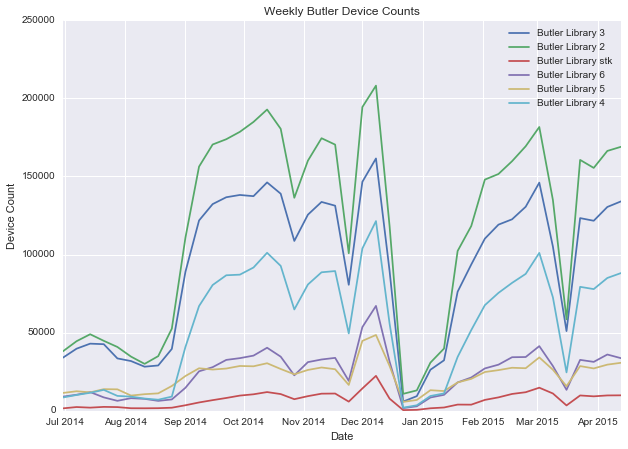

In [7]:
bldg_plot("Butler", group="week")

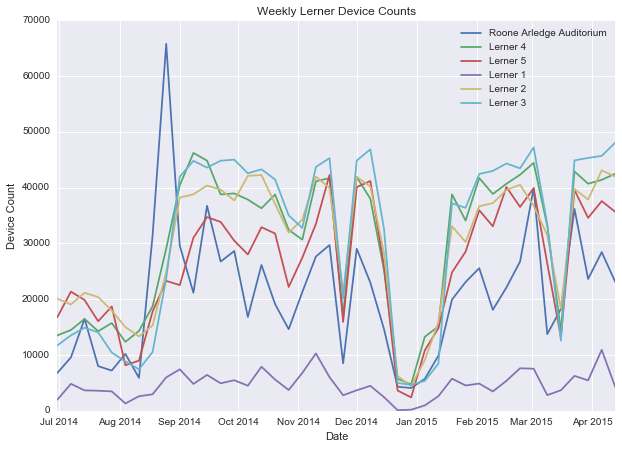

In [8]:
bldg_plot("Lerner", group="week")

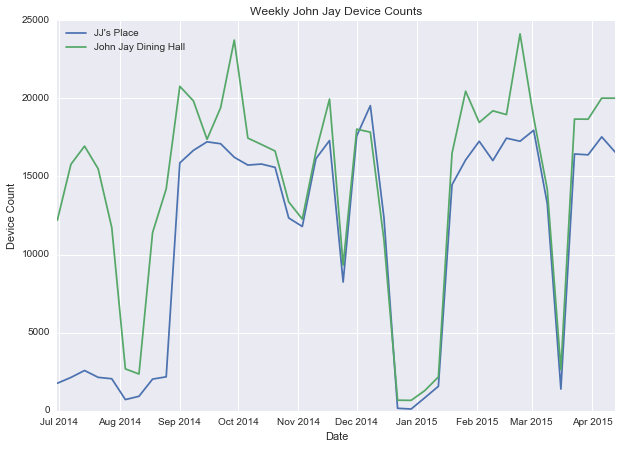

In [9]:
bldg_plot("John Jay", group="week")

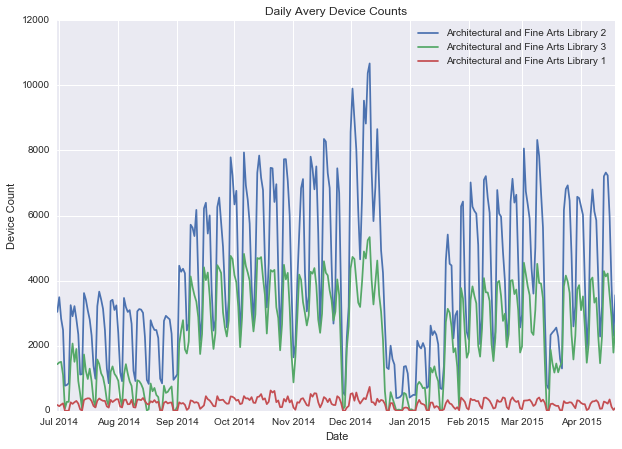

In [10]:
bldg_plot("Avery", group="day")